# Week 6 - Data visualisation

Learning objectives: 
- get an understanding in which situation to use certain visualisation tools
- understand what a discrete and continuous random variable is
- understand the difference between a population (data generation process) and empirical distribution/density

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import names
from sklearn.datasets import make_sparse_spd_matrix

plt.rcParams["figure.figsize"] = (16,9)
plt.close("all")

## Line plot

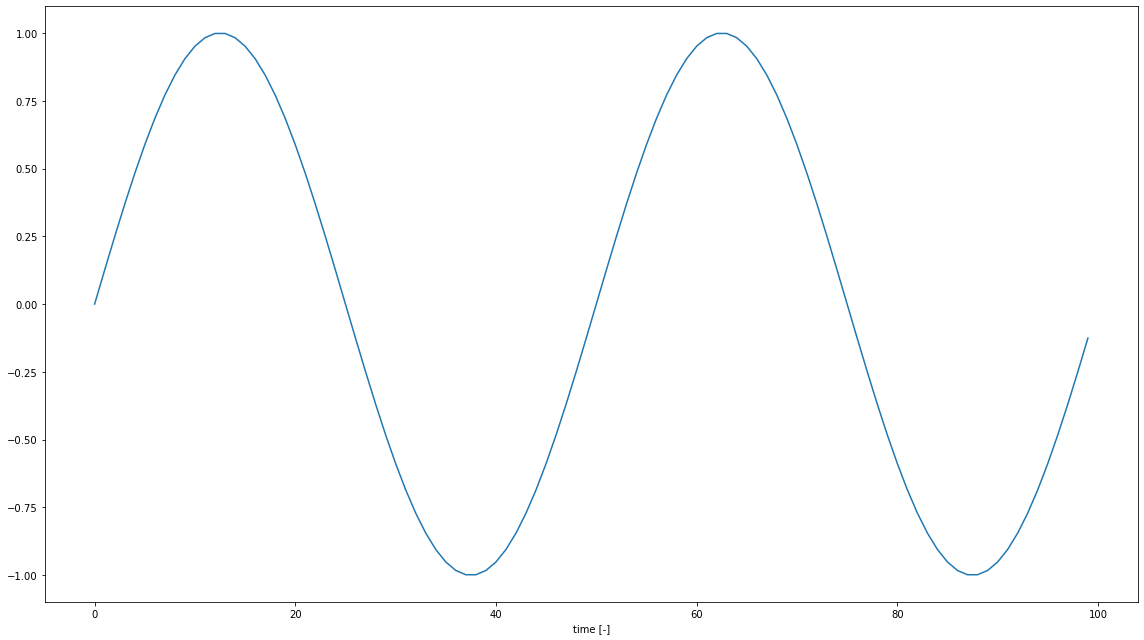

In [245]:
fig, ax = plt.subplots()
ax.plot(np.arange(100), np.sin(2*np.pi * np.arange(100) / 50))
ax.set_xlabel("time [-]")
plt.tight_layout()

- a line plot is useful to visualize observations that are collected at regular intervals
- the x-axis usually represents time/time intervals 
- there usually exists a meaningful order of the x-axis values (for example: order values from the oldest to the most recently observed)
- the y-axis shows the observations

In [246]:
def _names(gender):
    return names.get_first_name(gender=gender)

np.random.seed(40)
N = 100
df = pd.DataFrame(data=np.random.randint(18, 21, N), columns=["age"], index=np.random.randint(1000,9999, N))
df["gender"] = np.random.binomial(1, 0.3, N)
df["gender"].replace({0:"male", 1:"female"}, inplace=True)
df["first_name"] = df["gender"].apply(lambda x: _names(x))
# df["first_name"] = [names.get_first_name() for i in range(N)]
df["last_name"] = [names.get_last_name() for i in range(N)]
df["final_grade"] = np.random.randint(1, 7, N)  # 1 being the best grade and 6 being the worst
df["native_speaker"] = [np.random.binomial(1, 1 - (grade/6)) for grade in df["final_grade"]]
df["parents_separated"] = np.random.randint(0, 3, N)
df["parents_separated"].replace({0: "no", 1: "yes",  2: "n/a"}, inplace=True)
df.index.name = "student_id"

In [247]:
# is there a meaningful order in this data to justify using a line plot for visualisations?
df.head(5)

,age,gender,first_name,last_name,final_grade,native_speaker,parents_separated
student_id,,,,,,,
4629,20,male,Michael,Lowe,5,0,n/a
8175,19,male,John,Steege,5,0,yes
5669,18,male,Shane,Wiggins,5,0,yes
6011,18,female,Christy,Parsons,5,0,no
4225,20,male,Adrian,Bellows,3,1,yes


## Bar plot 

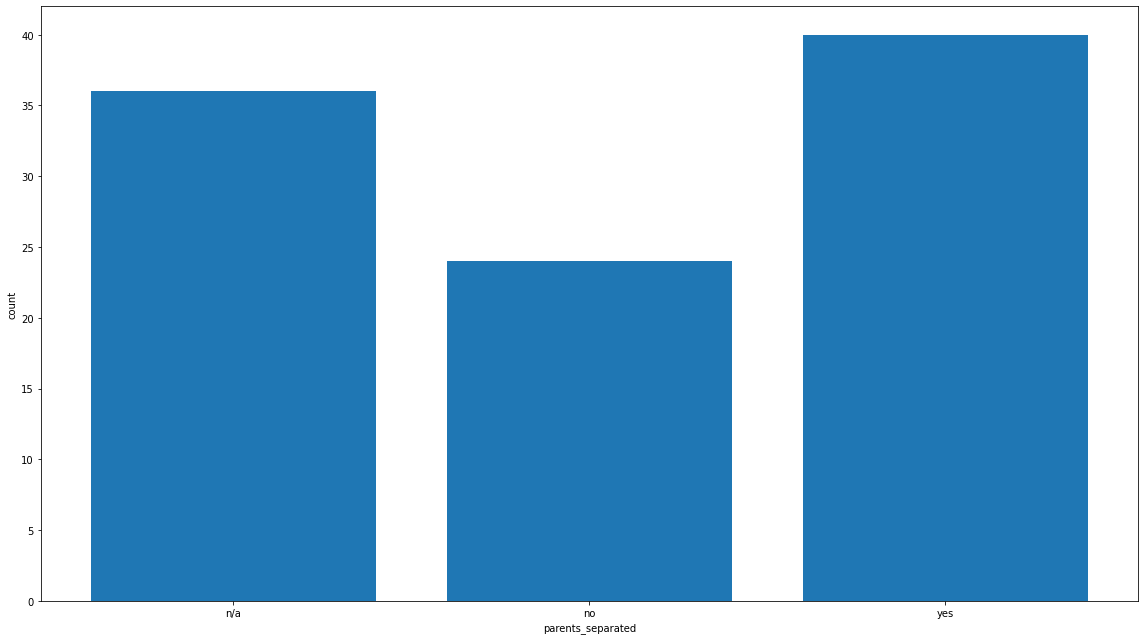

In [248]:
fig, ax = plt.subplots()
val, cnts = np.unique(df["parents_separated"], return_counts=True)
ax.bar(val, cnts)
ax.set_xlabel("parents_separated")
ax.set_ylabel("count")
plt.tight_layout()

- a bar chart/plot is generally used for categorical data
- the x-axis represents the categories
- the y-axis represents the quantity (count) for each category

### Bar plots are very versatile

In [249]:
data = df.groupby(["gender", "parents_separated"], as_index=False)["age"].count()
data.rename(columns={"age": "counts"}, inplace=True)
data.sort_values(["gender", "parents_separated"], inplace=True)
data

,gender,parents_separated,counts
0,female,n/a,4
1,female,no,9
2,female,yes,14
3,male,n/a,32
4,male,no,15
5,male,yes,26


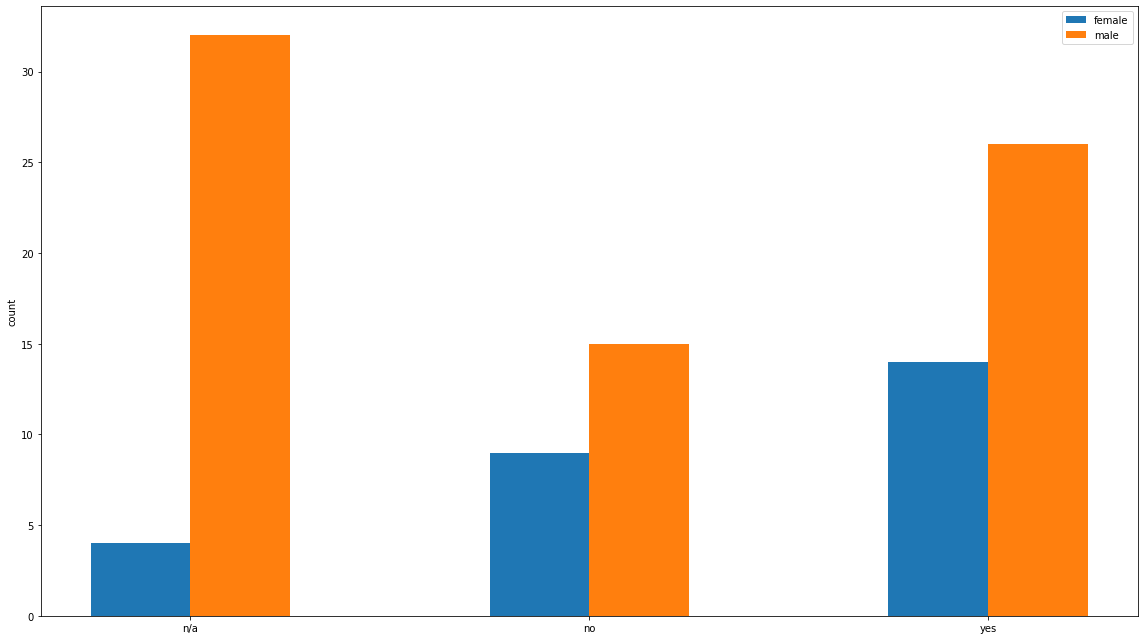

In [250]:
barwidth = 0.25
labels = data[data["gender"] == "female"]["parents_separated"]
fig, ax = plt.subplots()
for i, gender in enumerate(data["gender"].unique()):
    ax.bar(np.arange(3) + i*barwidth, data[data["gender"] == gender]["counts"], width=barwidth, label=gender)
plt.xticks([r + barwidth / 2 for r in range(3)], labels)
ax.set_ylabel("count")
ax.legend()
plt.tight_layout()

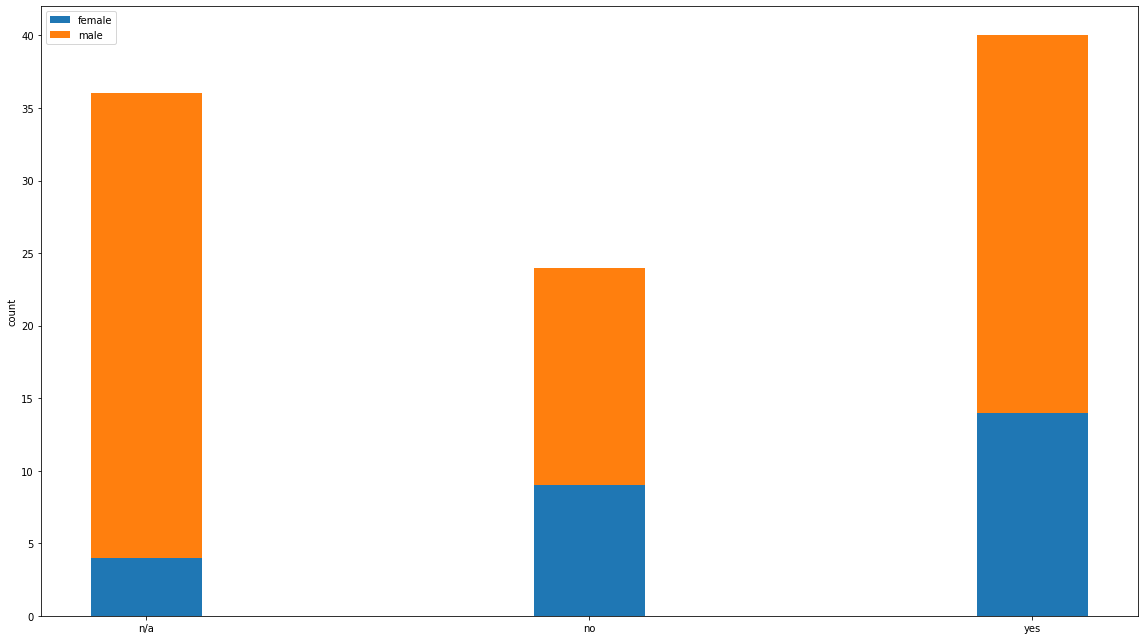

In [251]:
female_count = data[data["gender"] == "female"]["counts"]
male_count = data[data["gender"] == "male"]["counts"]

fig, ax = plt.subplots()
ax.bar(labels, female_count, width=barwidth, label="female")
ax.bar(labels, male_count, width=barwidth, label="male", bottom=female_count)
ax.set_ylabel("count")
ax.legend()
plt.tight_layout()

## A bar plot can be used to visualize the empirical probability mass function

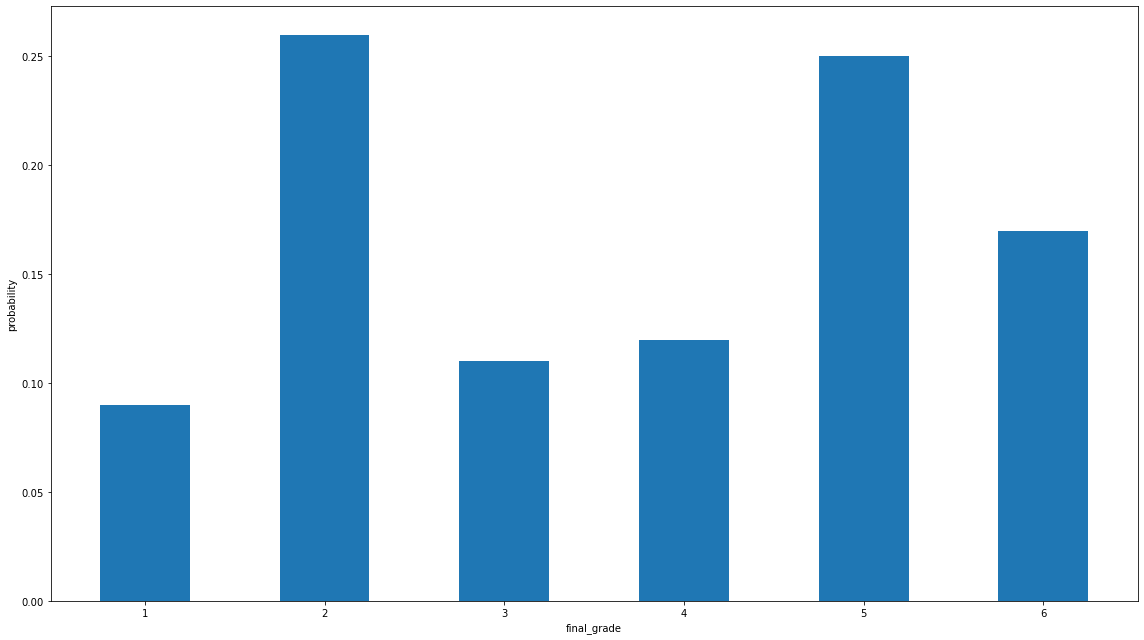

In [252]:
fig, ax = plt.subplots()
data = df["final_grade"].value_counts(sort=False)
ax.bar(np.arange(0, len(data)*2, 2), data.values / data.values.sum(), width=1)  # set barwidth to 1 
ax.set_xticks(np.arange(0, len(data)*2, 2))
ax.set_xticklabels(data.index)
ax.set_ylabel("probability")
ax.set_xlabel("final_grade")
plt.tight_layout()

### Coin flip example

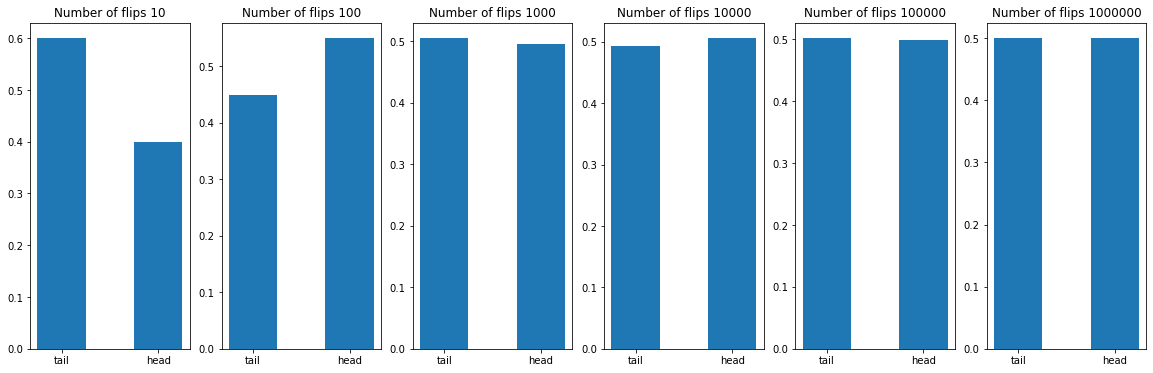

In [253]:
np.random.seed(42)
N_range = [1e1, 1e2, 1e3, 1e4,1e5, 1e6]

fig, ax = plt.subplots(ncols=len(N_range), figsize=(20, 6))
p = 0.5

bar_width = 1
x_pos = np.array([0, 2])
for i, N in enumerate(N_range): 
    X = np.random.binomial(1, p, int(N))  # simulate coin flips
    counts_head = sum(X[X == 1])  # heads correspond to X_i == 1
    counts_tail = int(N) - counts_head  # tails (X_i == 0)
    sample_probabilities = np.array([counts_head, counts_tail]) / N  
    ax[i].bar( x_pos, sample_probabilities, width=bar_width)
    ax[i].set_xticks(x_pos)
    ax[i].set_xticklabels(["tail", "head"])
    ax[i].set_title(f"Number of flips {int(N)}")

### but what about continuous variables? 

## Histogram
(think of a histogram as an extension of bar plots for continuous data)

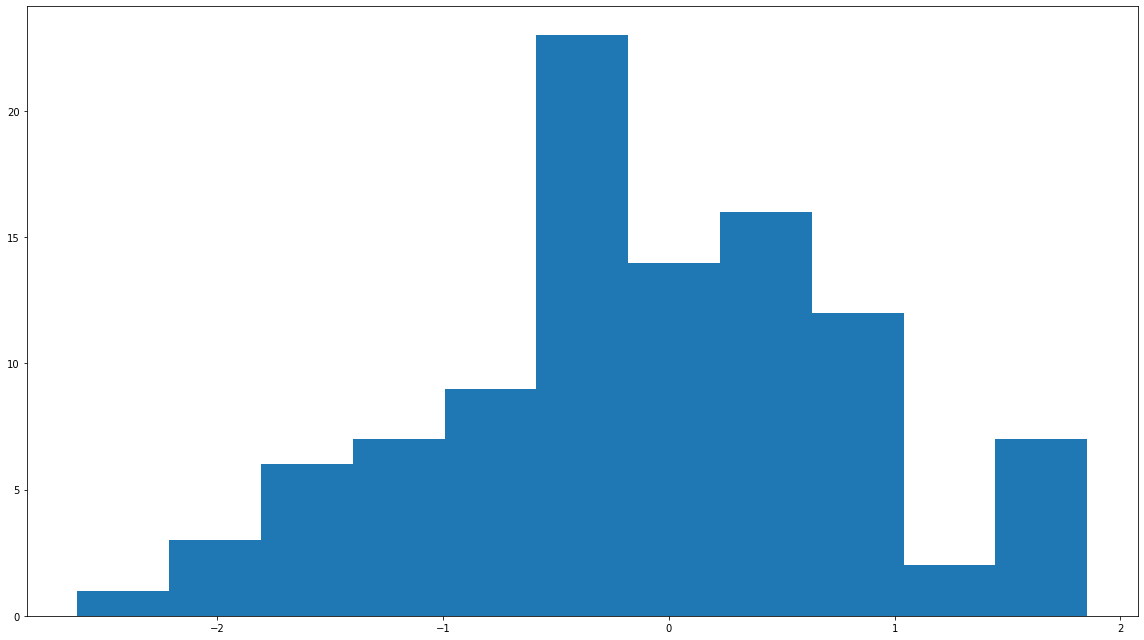

In [254]:
np.random.seed(42)
X = np.random.normal(0, 1, 100)

fig, ax = plt.subplots()
ax.hist(X, bins="auto")
plt.tight_layout()

### we can use several strategies to bin the data

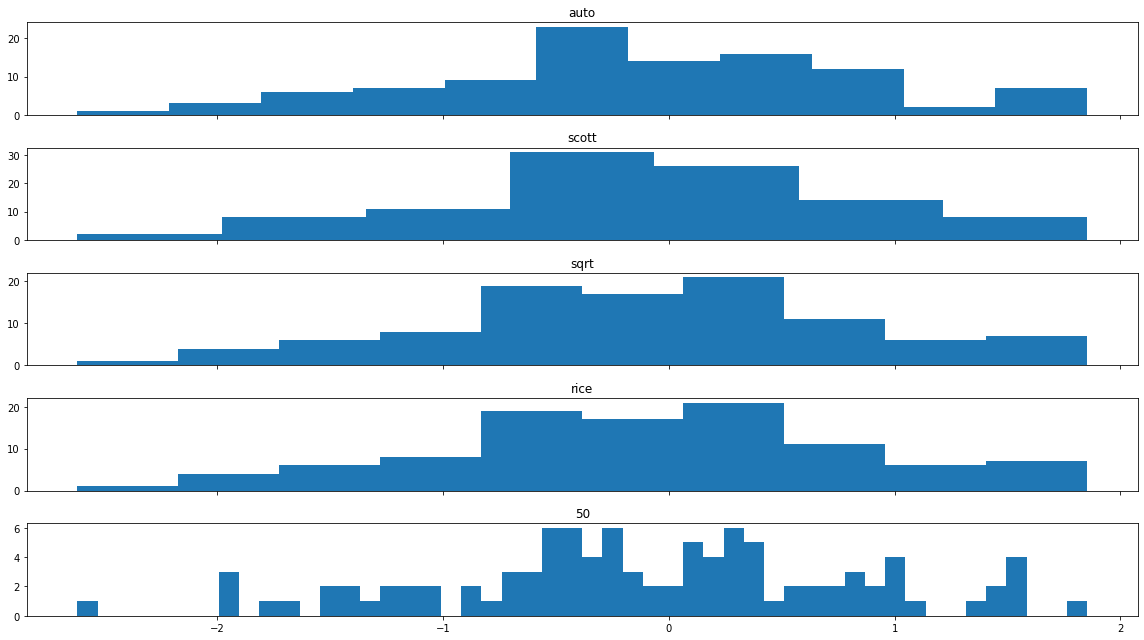

In [255]:
bin_strategies = ["auto", "scott", "sqrt", "rice", 50]
fig, ax = plt.subplots(nrows=len(bin_strategies), sharex=True)
for i, strategy in enumerate(bin_strategies):
    ax[i].hist(X, bins=strategy)
    ax[i].set_title(f"{strategy}")
plt.tight_layout()

### it is also possible to normalize each bin to approximate the probability density function of the random variable

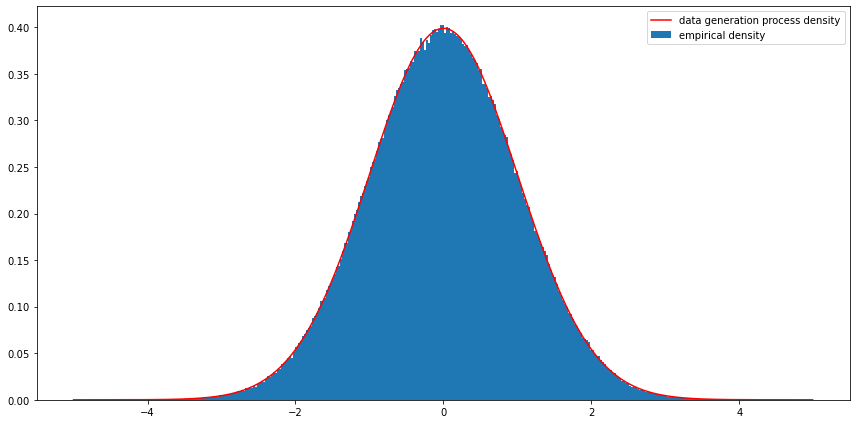

In [295]:
N = int(1e6)
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(np.random.normal(0, 1, N), density=True, bins="auto", label="empirical density")

x_vals = np.arange(-5, 5, 0.01)
density = (2*np.pi*1)**(-0.5) * np.exp(-0.5 * (x_vals**2))
ax.plot(x_vals, density, c="red", label="data generation process density") 

ax.legend()
plt.tight_layout()

## Scatter plot
- useful to investigate the relationship between 2 variables

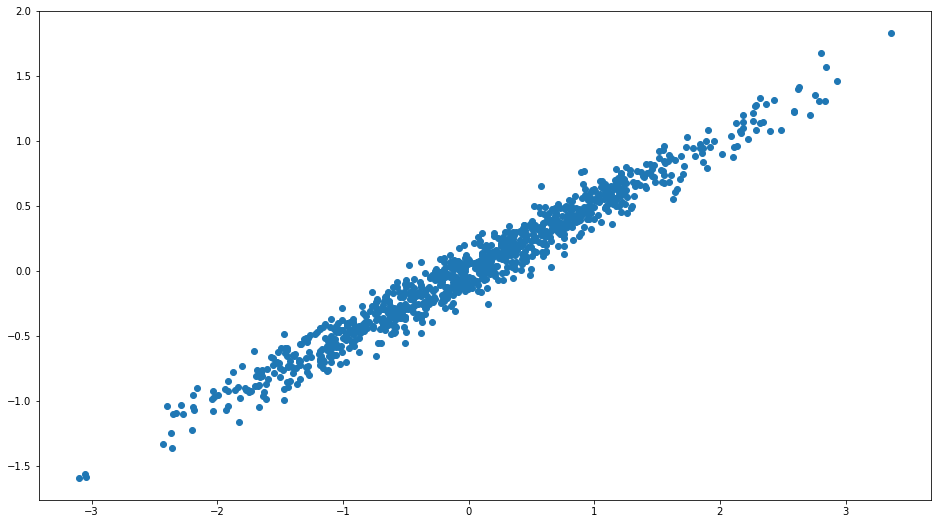

In [257]:
# linear correlation
N = 1000
X = np.random.normal(0, 1, N)
Y = X * 0.5 + np.random.normal(0, 0.1, N)

fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.tight_layout()

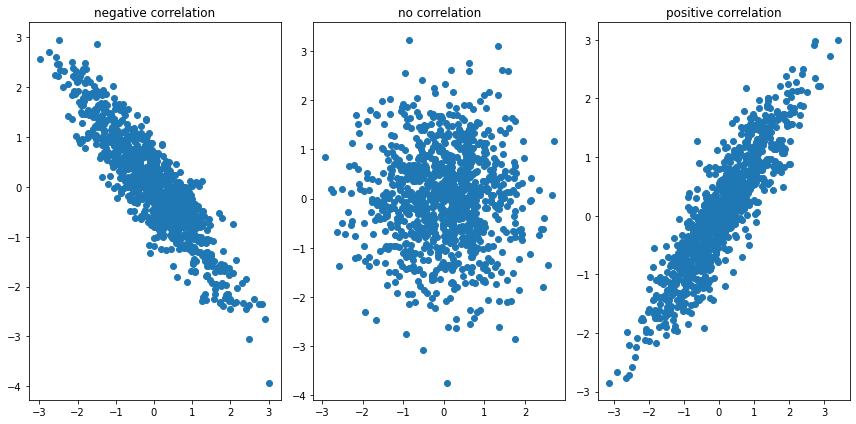

In [297]:
rho_list =[-0.9, 0, 0.9]
title_dict = {-0.9:"negative correlation", 0:"no correlation", 0.9:"positive correlation"}
N = 1000

fig, ax = plt.subplots(figsize=(12, 6), ncols=3)
for i, rho in enumerate(rho_list):
    corr_mat = np.eye(2)
    corr_mat[(0, 1), (1, 0)] = rho
    X = np.random.multivariate_normal([0,0], corr_mat, N)
    ax[i].scatter(X[:,0], X[:,1])
    ax[i].set_title(title_dict[rho])
plt.tight_layout()

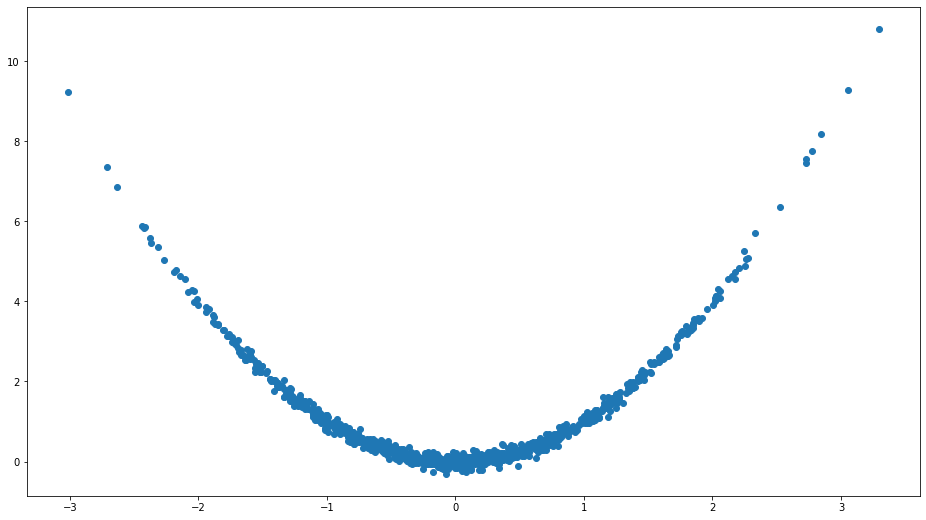

In [259]:
# nonlinear correlation
N = 1000
X = np.random.normal(0, 1, N)
Y = X ** 2 + np.random.normal(0, 0.1, N)

fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.tight_layout()

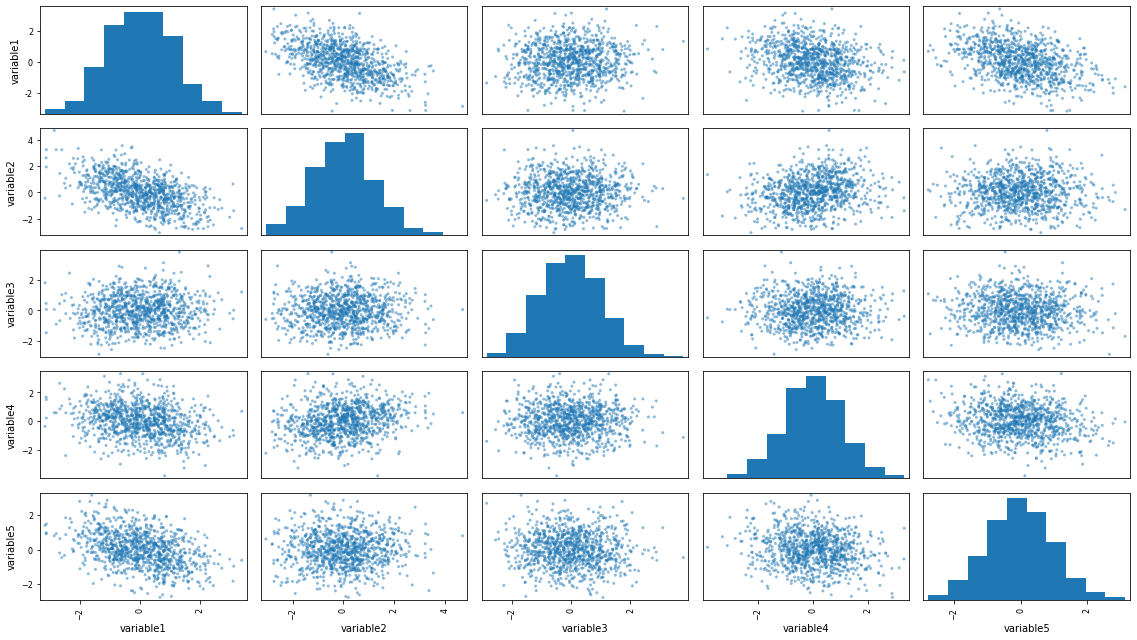

In [294]:
# scatter matrix
np.random.seed(41)
N, p = 1000, 5
cov_mat = make_sparse_spd_matrix(dim=p, alpha=0.6)

df = pd.DataFrame(data=np.random.multivariate_normal(p*[0], cov_mat, N), 
                  columns=[f"variable{i}" for i in range(1, p+1)])
axes = pd.plotting.scatter_matrix(df) 
plt.tight_layout()